# Traffic Sign Recognition Classifier

This project uses the traffic signs from the [German traffic sign dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset) to train a classifier. The classifier uses a convolutional neural network based on the Lenet architecture first described by Yann Lecun in this [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf).

The various steps followed in building, training, and tuning the various hyperparameters are:
- Step 0: Load the dataset 
- Step 1: Explore, visualize, and examine the distribution of the dataset
- Step 2: Design, train, and tune the hyperparameters of the CNN using the training and validation datasets
- Step 3: Use the model to make predictions on the test set as well as some traffic signs from the web
- Step 4: Analysis of the predictions
- Step 5: Summary of results and potential improvements
---

## Step 0: Load The Dataset
- Load the pickeled data
- Load in the preprocessed training, validation, and test datasets
- Extract the features and labels

In [1]:
# Load pickled data
import pickle

# Load in the preprocessed training, validation, and test datasets
training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Extract the features and labels
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES

### Basic data summary 
* Number of training examples = 34799
* Number of validation examples = 4410
* Number of testing examples = 12630
* Shape of traffic sign image = (32,32,3)
* Number of classes = 43

In [2]:
import numpy as np

# Number of training examples
#print("Shape of training data: ",x_train.shape)
n_train = len(x_train)

# Number of validation examples
#print("Shape of validation data: ", x_valid.shape)
n_validation = len(x_valid)

# Number of testing examples.
#print("Shape of testing data: ", x_test.shape)
n_test = len(x_test)

# What's the shape of an traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(train['labels'])+1 # starting with 0

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Extract the text identifying the traffic sign
This will be used later to convert the predicted labels to text identifying the traffic sign

In [3]:
# Convert the prediction to text identifying the traffic sign
import pandas as pd
signs = pd.read_csv('signnames.csv')
sign_names = signs['SignName']
print(sign_names[0]) #make sure it is printing out the 1st line = Speed limit(20km/h)

Speed limit (20km/h)


### Visualize and examine distribution of the dataset

#### Visualize training data

A random set of 5 images from the training dataset are shown below. Some of the images are quite blurry and are sometimes hard to see what it represents

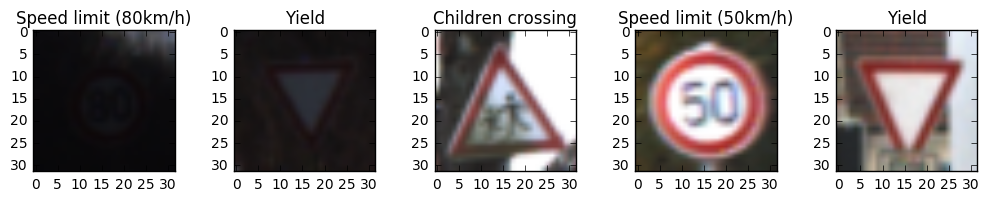

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

num_images = 5
fig1 = plt.figure(figsize = (10,10))

for i in range(num_images):
    fig1.add_subplot(1, num_images, i+1)
    index_train = random.randint(0, len(x_train))
    image_train = x_train[index_train].squeeze()
    plt.imshow(image_train)
    plt.title(sign_names[y_train[index_train]])
plt.tight_layout()

#### Distribution of classes in training data

The histogram plot below shows that all classes are not equally distributed in the dataset. We have very high representation of around 2000 images for traffic signs like 'Speed limit (50 km/h)' (label 2) and very low representation of around 150 images for some signs like 'Go Straight or Left' (label 37) 

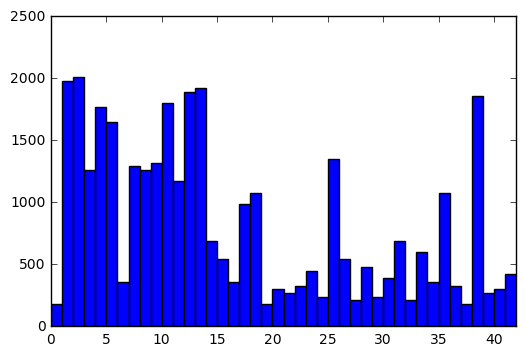

In [5]:
labels_train = np.array(train['labels'])
hist_train, bin_edges = np.histogram(labels_train,bins=np.arange(n_classes))
plt.bar(bin_edges[:-1], hist_train, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

#### Visualize the validation data

A random set of 5 images from the validation set are shown below. 

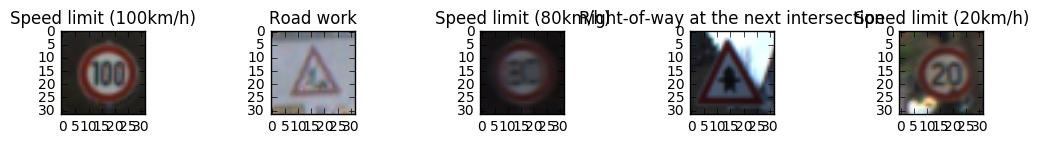

In [6]:
# Visualize the validation data
num_images = 5
fig = plt.figure(figsize = (10,10))

for i in range(num_images):
    fig.add_subplot(1, num_images, i+1)
    index_valid = random.randint(0, len(x_valid))
    image_valid = x_valid[index_valid].squeeze()
    plt.imshow(image_valid)
    plt.title(sign_names[y_valid[index_valid]])
plt.tight_layout()

#### Distribution of validation data

The histogram plot below shows the distribution of classes is similar to the training dataset. Just like the training dataset we have very high representation of around 240 images for traffic signs like 'Speed limit (50 km/h)' (label 2) and very low representation of around 25 images for some signs like 'Go Straight or Left' (label 37) 

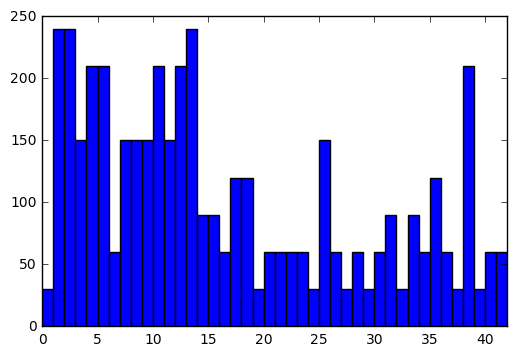

In [7]:
labels_valid = np.array(valid['labels'])
hist_valid, bin_edges = np.histogram(labels_valid,bins=np.arange(n_classes))
plt.bar(bin_edges[:-1], hist_valid, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

#### Visualize the test data

A random set of 5 images from the rwar set are shown below. 

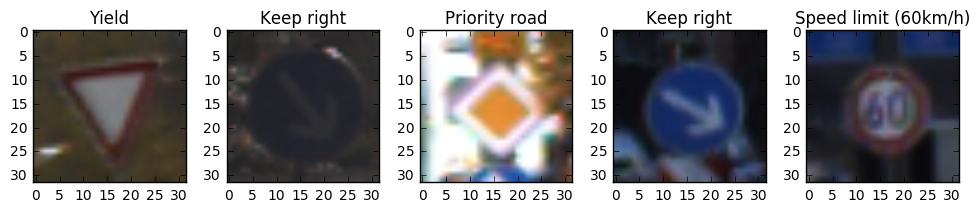

In [10]:
# Visualize the test data
num_images = 5
fig = plt.figure(figsize = (10,10))

for i in range(num_images):
    fig.add_subplot(1, num_images, i+1)
    index_test = random.randint(0, len(x_test))
    image_test = x_test[index_test].squeeze()
    plt.imshow(image_test)
    plt.title(sign_names[y_test[index_test]])
plt.tight_layout()

#### Distribution of Test data

The histogram plot below shows the distribution of classes is similar to the training dataset. The distribution off the various classes represented is not too different from the training and validation sets. 

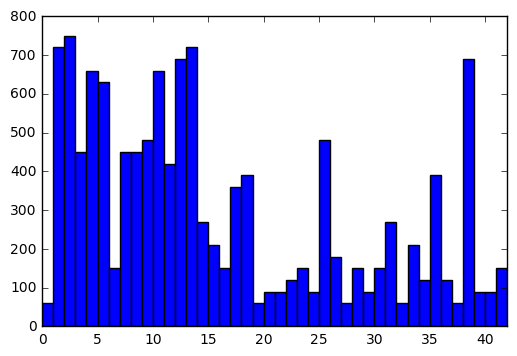

In [11]:
labels_test = np.array(test['labels'])
hist_test, bin_edges = np.histogram(labels_test,bins=np.arange(n_classes))
plt.bar(bin_edges[:-1], hist_test, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

----

## Step 2: Design and Validate a Model Architecture

In this step, a CNN is designed and trained using the training and validation datasets. The various hyperparameters of the CNN like the number of layers, learning rate, etc are tuned to get a low training and validation error. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

### Pre-process the Data Set

Features used to train a deep neural network or CNN model should be scaled with zero mean and equal variance. Because this is image data with pixel intensities varying between 0-255, a simple way to normalize the data is to do:
`(pixel - 128)/ 128`

There are other potential standard scaling techniques offered in the sklearn library that were not explored.

Because very good results were obtained as described in this [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) using the standard 32x32 images in color, the conversion to grayscale was not explored. 

In [4]:
### Preprocess the data here. It is required to normalize the data.
from sklearn.preprocessing import StandardScaler

def scale_data(x, scaler, scaler_type):

    if (scaler_type == "simple"):
        x = x.astype('float32')
        x_scaled = (x-128.)/128.
        #print(x_scaled.shape)
        return x_scaled, 128
    
    if (scaler == 0):
        if (scaler_type == "standard_scaler"):
            scaler = StandardScaler().fit(x)
            x_scaled = scaler.transform(x)
        elif (scaler_type == "min_max"):
            scaler = MinMaxScaler(feature_range=(0, 1))
            x_scaled = scaler.fit_transform(X)
        else:
            print("Scale is 0 and Unknown scaler type!")
            return 0
    else:
        if(scaler_type == "standard_scaler"):
            x_scaled = scaler.transform(x)
        elif(scaler_type == "min_max"):
           x_scaled = scaler.fit_transform(X)
        else:
            print("Unknown scaler type!")
            return 0
    
    return x_scaled, scaler     

In [5]:
x_train, scaler = scale_data(x_train, 0, "simple")
x_valid,scaler = scale_data(x_valid, 0, "simple")
x_test,scaler = scale_data(x_test, 0, "simple")

print('Mean and Stddev of training data: ',np.mean(x_train), np.std(x_train))
print('Mean and Stddev of validation data: ', np.mean(x_valid), np.std(x_valid))
print('Mean and Stddev of test data: ', np.mean(x_test), np.std(x_test))

Mean and Stddev of training data:  -0.354081 0.530084
Mean and Stddev of validation data:  -0.347216 0.545998
Mean and Stddev of test data:  -0.358216 0.537063


In [6]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)
print(np.mean(x_train), np.std(x_train))

-0.354081 0.530085


### Lenet Architecture with some modifications

Started off with the basic [Lenet](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf) architecture covered in the lectures and increased the depth and the doubled the neurons in each layer.

- Input images: 32x32x3 (RGB image)
- conv_l1: convolutional layer with depth of 12, filter size 5x5, stride 1x1, 'VALID' padding, output 28x28x12
- Relu Activation
- Max Pooling with stride 2x2, 'SAME' padding, output 14x14x12
- conv_l2: convolutional layer with depth of 32, filter size 2x2, stride 1, 'VALID' padding, output 10x10x32
- Relu Activation
- Max Pooling with stride 2x2, 'SAME' padding, ouput 5x5x32, 
- Flatten to an input size of 1x800
- fc_l3: 3rd layer is a fully connected layer with 800 inputs and 240 outputs
- Relu Activation
- Dropout
- fc_l4: 4th layer is a fully connected layer with 240 inputs and 160 outputs
- Relu Activation
- Dropout
- fc_l5: 5th layer is a fully connected layer with 160 inputs and 80 outputs
- Relu Activation
- Dropout
- fc_l6: 6th layer is a fully connected layer with 80 inputs and n classes (43 in this case)
- Output is a vector of size 43 which is passed through a softmax

Dropout was implemented in each of the fully connected layers, except later. The initiliazation of the weights was done using Xavier initialization. The biases were initialized to zeros.


#### Initialization of the weights
Initially, the weights were initialized using a normal distribution with arbitrarily chosen mu and sigma values based on the values suggested in the lectures. 

As the network gets deeper, a more effective way to prevent exploding/vanishing gradients was found to be the Xavier initilization as described in this [paper](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf). This is what I ended up using.

In [7]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob=1):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    #mu = 0
    #sigma = 0.1
    
    ''' -------- Layer 1: Convolutional ------------'''
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12
    w_cl1 = tf.get_variable("w_cl1", shape = [5,5,3,12], initializer=tf.contrib.layers.xavier_initializer())
    b_cl1 = tf.Variable(tf.zeros(12))
    conv_l1 = tf.nn.conv2d(x, w_cl1, strides=[1, 1, 1, 1], padding='VALID') + b_cl1
    
    # Relu Activation.
    act_l1 = tf.nn.relu(conv_l1)
    
    # Max Pooling. Input = 28x28x12. Output = 14x14x12.
    pool_l1 = tf.nn.max_pool(act_l1,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1],padding='SAME' )
    
    ''' -------- Layer 2: Convolutional ------------'''
    # Layer 2: Convolutional. Output = 10x10x32.
    w_cl2 = tf.get_variable("w_cl2", shape = [5,5,12,32], initializer=tf.contrib.layers.xavier_initializer())
    b_cl2 = tf.Variable(tf.zeros(32))
    conv_l2 = tf.nn.conv2d(pool_l1, w_cl2,strides = [1,1,1,1], padding = 'VALID') + b_cl2
    
    # Relu Activation.
    act_l2 = tf.nn.relu(conv_l2)
    
    # Max Pooling. Input = 10x10x32. Output = 5x5x32.
    pool_l2 = tf.nn.max_pool(act_l2,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME' )

    # Flatten. Input = 5x5x32. Output = 800.
    flat_fcl = flatten(pool_l2)
    
    ''' -------- Layer 3: Fully Connected ------------'''
    # Layer 3: Fully Connected. Input = 800. Output = 240.
    w_fcl3 = tf.get_variable("w_fcl3", shape = [800,240], initializer=tf.contrib.layers.xavier_initializer())
    b_fcl3 = tf.Variable(tf.zeros(240))
    linear_fcl3 = tf.matmul(flat_fcl, w_fcl3)+b_fcl3
    
    # Relu Activation.
    act_fcl3 = tf.nn.relu(linear_fcl3)
    
    # Dropout
    fc_l3 = tf.nn.dropout(act_fcl3, keep_prob)
    
    ''' -------- Layer 4: Fully Connected ------------'''
    # Fully Connected. Input = 240. Output = 160.
    #w_fcl4 = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma))
    w_fcl4 = tf.get_variable("w_fcl4", shape = [240, 160], initializer=tf.contrib.layers.xavier_initializer())
    b_fcl4 = tf.Variable(tf.zeros(160))
    linear_fcl4 = tf.matmul(fc_l3, w_fcl4)+b_fcl4
    
    # Relu Activation.
    act_fcl4 = tf.nn.relu(linear_fcl4)
    
    # Dropout
    fc_l4 = tf.nn.dropout(act_fcl4, keep_prob)
    
    ''' --------- Layer 5: Fully Connected ----------  '''
    #Fully Connected. Input = 160. Output = 80
    #w_fcl4 = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma))
    w_fcl5 = tf.get_variable("w_fcl5", shape = [160, 80], initializer=tf.contrib.layers.xavier_initializer())
    b_fcl5 = tf.Variable(tf.zeros(80))
    linear_fcl5 = tf.matmul(fc_l4, w_fcl5)+b_fcl5
    
    # Relu Activation.
    act_fcl5 = tf.nn.relu(linear_fcl5)
    
    # Dropout
    fc_l5 = tf.nn.dropout(act_fcl5, keep_prob)
    
    ''' -------- Layer 6: Fully Connected ------------'''
    #Fully Connected. Input = 80. Output = n_classes
    #w_fcl5 = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean=mu, stddev=sigma))
    w_fcl6 = tf.get_variable("w_fcl6", shape = [80, n_classes], initializer=tf.contrib.layers.xavier_initializer())
    b_fcl6 = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc_l5, w_fcl6)+b_fcl6
    #print(logits.shape)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Initialize features and labels

Create placeholders for the features and labels  and one_hot encode the labels for the traffic signs

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

#### pipeline parameters

In [9]:
EPOCHS = 50
BATCH_SIZE = 128
LEARNING_RATE = 0.001

# Dropout parameter 
keep_prob = tf.placeholder(tf.float32)

** Training the model **

**EPOCHS** 

Initially started with a small number of epocha (around 10) and the validation accuracy was less than 90%

When I increased the epochs to around 100, I noticed that the training accuracy was hitting close to 100% at around 50 epochs and the validaton accuracy was not increasing after 50 epochs.

I chose 50 epochs.

**BATCH_SIZE**

Increasing the batch size to 256 and 512 did not improve accuracy. 128 seems to be working pretty well. Settled on a batch size of 

**LEARNING_RATE**

Tried tuning learning rate systematically on a logarithmic scale. 0.01 did not work at all. 0.0001 worked reasonably. But I got very good convergence with 0.001 learning rate, which is what I ended up using

**Adam Optimizer**

Mini batch Gradient descent with Adam optimizer gives a fast convergence

Could have used L2 regularization because the model was overfitting the training set,but dropout is more effective. 

**Dropout** 

With no dropout, training accuracy was around 99.5% and validation accuracy was around 94%. Clearly the network is overfitting the training data because of the disparity in the training and validation accuracy.

Dropout is a regurlarization technique that is intended to prevent overfitting. This was covered in lectures. This idea was originally introduced in this [paper](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)

As suggested in the paper, I used a keep_prob of 0.5 and this brought down the error between the training and validation accuracy. I ended up with the validation accuracy around 97%, while the training accuracy was still around 99.7%

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

#### Evaluate model

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(x_valid, y_valid)
        training_accuracy = evaluate(x_train, y_train)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.521
Training Accuracy = 0.585

EPOCH 2 ...
Validation Accuracy = 0.805
Training Accuracy = 0.859

EPOCH 3 ...
Validation Accuracy = 0.857
Training Accuracy = 0.925

EPOCH 4 ...
Validation Accuracy = 0.888
Training Accuracy = 0.940

EPOCH 5 ...
Validation Accuracy = 0.922
Training Accuracy = 0.971

EPOCH 6 ...
Validation Accuracy = 0.947
Training Accuracy = 0.986

EPOCH 7 ...
Validation Accuracy = 0.932
Training Accuracy = 0.989

EPOCH 8 ...
Validation Accuracy = 0.949
Training Accuracy = 0.993

EPOCH 9 ...
Validation Accuracy = 0.946
Training Accuracy = 0.993

EPOCH 10 ...
Validation Accuracy = 0.952
Training Accuracy = 0.996

EPOCH 11 ...
Validation Accuracy = 0.956
Training Accuracy = 0.995

EPOCH 12 ...
Validation Accuracy = 0.958
Training Accuracy = 0.996

EPOCH 13 ...
Validation Accuracy = 0.952
Training Accuracy = 0.995

EPOCH 14 ...
Validation Accuracy = 0.961
Training Accuracy = 0.997

EPOCH 15 ...
Validation Accuracy = 0.961
Tra

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Predict accuracy on Test Set

The accuracy on the test set is 95.1%, which is reasonable given that I have not used a much deeper architecture than the original Lenet architecture.

In [12]:
import tensorflow as tf
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess,'./lenet')

    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.951


### Final Results

* Training set accuracy of **99.9%**
* Validation set accuracy of **97.0%**
* Test set accuracy of **95.1%**

### Discussion of Final Results

Clearly even after applying dropout the model is overfitting the training data. One way to resolve this is to with a deeper neural network architecture with not just more neurons, but with more fully connected layers.

One approach to achieve very high accuracies on the German traffic sign dataset has been described in this [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf): 'Traffic sign recognition with multi scale convolutional neural networks' where the branched output from the 1st layer is fed along with the ouputs from the 2nd layer to the classifier. This branching seems to perform better than the single layer feedforward architecture implemented above. 

The paper also talks about increasing the number of input training images by transforming the original training set by applying different transformations: perturbations in position, scale, rotation of the training images was used.

A combination of these approaches can be used to reduce the overfitting on the training data, and may produce an improvement in the validation and test set accuracies.


### Load and Output the Images

Found 10 random images by doing a google image search for German traffic signs. Tried to pick signs that were slightly blurred or are at angle to see how well the classifier is doing

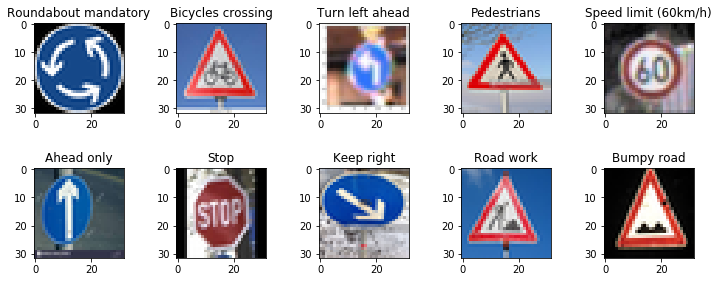

In [15]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
web_images = []
image_file_names = []
for image_file in os.listdir('images_from_web'):
    img = Image.open('images_from_web/'+image_file)
    img = img.convert('RGB')
    img = img.resize((32, 32), Image.ANTIALIAS)
    img = np.array(img, dtype = 'uint8')
    img = np.reshape(img, (32, 32, 3))
    web_images.append(img)
    image_file_name = image_file.rsplit(".",1)[0]
    image_file_names.append(int(image_file_name)) #storing away filenames as ints!
web_images = np.array(web_images, dtype='uint8')
    
# Visualize the images from the web
num_images = 5
fig = plt.figure(figsize = (10,10))

for i, image in enumerate(web_images):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(sign_names[int(image_file_names[i])])
plt.tight_layout()

### Predict the Sign Type for Each Image

The images from the web were scaled the same way as the training, validation, and test data

Run the prediction on the web_images

In [16]:
x_web_images,scaler = scale_data(web_images, 0, "simple")

prediction_web_image = tf.argmax(logits,1)
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess,'./lenet')
    predicted_label_web_images = sess.run(prediction_web_image,feed_dict = {x:x_web_images, keep_prob: 1})

**Visual Comparison of each image**

By comparing the predicted labels against the image, it is clear that the 'Ahead only' is being predicted as a roundabout. It is clear to me why this is being incorrectly predicted. There are enough 'Ahead only' images in the training dataset.

Also the 'pedestrian crossing' is being predicted as 'General Caution'. This might because the crossing is not clear in the image of the sign below. Without the crossing, the person looks more like the exclamation in a 'General Caution' sign.

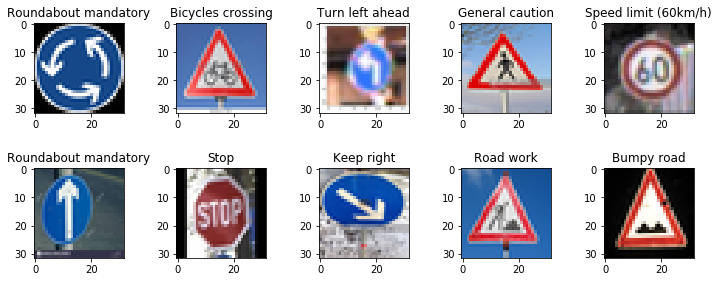

In [17]:
# Compare the prediction against the image visually
fig = plt.figure(figsize = (10,10))
    
for i, image in enumerate(web_images):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(sign_names[predicted_label_web_images[i]])

plt.tight_layout()

### Analyze Performance

The accuracy of prediction is found to be 80%. 2 out of 10 images were incorrectly predicted

In [19]:
correct_prediction_web_images = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation_web_images = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                              
saver = tf.train.Saver()
num_images = len(image_file_names)
accuracy_web_images = 0
with tf.Session() as sess:
    saver.restore(sess,'./lenet')
    predicted_label_web_accuracy = sess.run(accuracy_operation_web_images,feed_dict = {x:x_web_images,y:image_file_names, keep_prob:1.0})
print()
print("Accuracy on images from the web: ",predicted_label_web_accuracy)


Accuracy on images from the web:  0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

The model was very confident of its predictions most of the times. This was the case even for the images it got incorrect. 
* The 'Ahead Only' was predicted as a 'Roundabout mandatory' with a softmax probability of 0.9999. 
* The 'pedestrian crossing' sign was predicted as a 'General Caution' with a softmax probability of 1.0. 

This is an indicator that the model is overfitting the training data even after implementing dropout. Some options to improve the prediction on the test set/new images would be to introduce more training images, introduce more layers in the neural network.

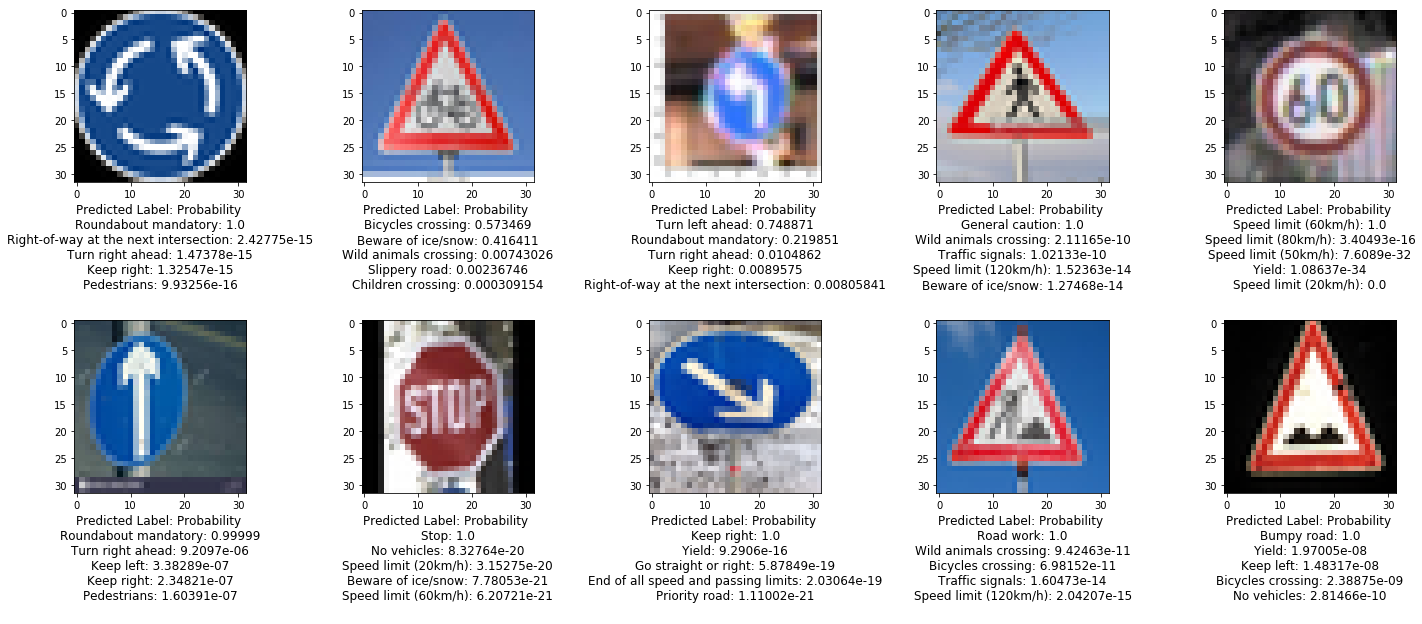

In [21]:
top_k_values, top_k_indices = tf.nn.top_k(tf.nn.softmax(logits), k=5)

saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess,'./lenet')
    values, indices = sess.run([top_k_values, top_k_indices],feed_dict = {x:x_web_images, keep_prob:1.0})
    
    
#### Need to display the images with the corresponding softmax probabilities
fig = plt.figure(figsize = (20,20))
    
for i, image in enumerate(web_images):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(image)
    plt.xlabel("Predicted Label: Probability \n" +
                sign_names[indices[i][0]] + ": "+ str(values[i][0]) + "\n" +
                sign_names[indices[i][1]] + ": "+ str(values[i][1]) + "\n" +
                sign_names[indices[i][2]] + ": "+ str(values[i][2]) + "\n" +
                sign_names[indices[i][3]] + ": "+ str(values[i][3]) + "\n" +
                sign_names[indices[i][4]] + ": "+ str(values[i][4]) + "\n", fontsize = 12)

plt.tight_layout()

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")